# Data Understanding dengan PyCaret

Notebook ini berisi analisis pemahaman data untuk dataset Iris klasik menggunakan PyCaret library yang akan digunakan untuk klasifikasi spesies bunga iris.

## 1. Import Library dan Load Dataset

In [1]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import PyCaret untuk EDA dan classification
from pycaret.datasets import get_data
from pycaret.classification import *

# Atur style untuk visualisasi
plt.style.use('default')
sns.set_palette("husl")

print("Library berhasil diimport")
try:
    import pycaret
    print(f"PyCaret version: {pycaret.__version__}")
except:
    print("PyCaret berhasil diimport")

Library berhasil diimport
PyCaret version: 3.3.2


In [2]:
# Load dataset Iris dari file CSV atau PyCaret
try:
    # Coba load dari file lokal
    df = pd.read_csv('data_iris.csv', delimiter=';')
    
    # Konversi kolom numerik yang menggunakan koma sebagai decimal separator
    numeric_columns = ['sepal length', 'sepal width', 'petal length', 'petal width']
    
    for col in numeric_columns:
        if col in df.columns:
            # Konversi koma ke titik untuk decimal
            df[col] = df[col].astype(str).str.replace(',', '.').astype(float)
    
    # Rename kolom untuk konsistensi dengan format sklearn
    df = df.rename(columns={
        'sepal length': 'sepal_length',
        'sepal width': 'sepal_width', 
        'petal length': 'petal_length',
        'petal width': 'petal_width',
        'Class': 'species'
    })
    
    # Bersihkan nama spesies
    df['species'] = df['species'].str.replace('Iris-', '')
    
    # Drop kolom id jika ada
    if 'id' in df.columns:
        df = df.drop('id', axis=1)
    
    print("Dataset Iris berhasil dimuat dari data_iris.csv")
    
except FileNotFoundError:
    # Jika file tidak ditemukan, gunakan dataset Iris dari PyCaret
    print("File lokal tidak ditemukan. Menggunakan dataset Iris dari PyCaret...")
    df = get_data('iris')
    print("Dataset Iris berhasil dimuat dari PyCaret")

print(f"Ukuran dataset: {df.shape[0]} baris, {df.shape[1]} kolom")
print(f"Kolom dataset: {list(df.columns)}")
df.head()

Dataset Iris berhasil dimuat dari data_iris.csv
Ukuran dataset: 150 baris, 5 kolom
Kolom dataset: ['species', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']


,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


## 2. Setup PyCaret Environment untuk EDA

In [3]:
# Setup PyCaret environment untuk classification
# Ini akan mempersiapkan dataset untuk analisis
clf = setup(
    data=df, 
    target='species',
    session_id=123,
    train_size=0.8,
    verbose=False,  # Mengurangi output verbose
    profile=False  # Menonaktifkan profiling otomatis
)

print("\n=== PYCARET SETUP BERHASIL ===")
print("Environment PyCaret telah dikonfigurasi untuk analisis klasifikasi")


=== PYCARET SETUP BERHASIL ===
Environment PyCaret telah dikonfigurasi untuk analisis klasifikasi


## 3. Exploratory Data Analysis (EDA) dengan PyCaret

In [4]:
# Informasi dasar dataset
print("=== INFORMASI DATASET IRIS ===\n")

# Dataset info
print(f"[INFO] Ukuran Dataset: {df.shape[0]} baris x {df.shape[1]} kolom")
print(f"[INFO] Target Variable: species")
print(f"[INFO] Fitur: {df.shape[1] - 1} fitur numerik")
print(f"[INFO] Kelas: {df['species'].nunique()} kelas unik")
print(f"[INFO] Kelas tersedia: {', '.join(df['species'].unique())}")

print("\n=== STATISTIK DESKRIPTIF ===")
df.describe().round(3)

=== INFORMASI DATASET IRIS ===

[INFO] Ukuran Dataset: 150 baris x 5 kolom
[INFO] Target Variable: species
[INFO] Fitur: 4 fitur numerik
[INFO] Kelas: 3 kelas unik
[INFO] Kelas tersedia: setosa, versicolor, virginica

=== STATISTIK DESKRIPTIF ===


,sepal_length,sepal_width,petal_length,petal_width
count,150.000,150.000,150.000,150.000
mean,5.843,3.054,3.759,1.199
std,0.828,0.434,1.764,0.763
min,4.300,2.000,1.000,0.100
25%,5.100,2.800,1.600,0.300
50%,5.800,3.000,4.350,1.300
75%,6.400,3.300,5.100,1.800
max,7.900,4.400,6.900,2.500


In [5]:
# Informasi tipe data dan missing values
print("=== INFORMASI TIPE DATA DAN KUALITAS DATA ===\n")

# Data types
print("[STRUKTUR] Tipe Data:")
for col in df.columns:
    dtype = df[col].dtype
    unique_count = df[col].nunique()
    print(f"   - {col}: {dtype} ({unique_count} nilai unik)")

# Missing values
print("\n[KUALITAS] Missing Values:")
missing_count = df.isnull().sum()
if missing_count.sum() == 0:
    print("   [OK] Tidak ada missing values")
else:
    for col, count in missing_count.items():
        if count > 0:
            percentage = (count / len(df)) * 100
            print(f"   - {col}: {count} ({percentage:.1f}%)")

# Duplicate check
duplicates = df.duplicated().sum()
print(f"\n[KUALITAS] Data Duplikat: {duplicates} baris")
if duplicates == 0:
    print("   [OK] Tidak ada data duplikat")

=== INFORMASI TIPE DATA DAN KUALITAS DATA ===

[STRUKTUR] Tipe Data:
   - species: object (3 nilai unik)
   - sepal_length: float64 (35 nilai unik)
   - sepal_width: float64 (23 nilai unik)
   - petal_length: float64 (43 nilai unik)
   - petal_width: float64 (22 nilai unik)

[KUALITAS] Missing Values:
   [OK] Tidak ada missing values

[KUALITAS] Data Duplikat: 3 baris


=== ANALISIS TARGET VARIABLE ===

[DISTRIBUSI] Distribusi Kelas:
   - setosa: 50 sampel (33.3%)
   - versicolor: 50 sampel (33.3%)
   - virginica: 50 sampel (33.3%)

[STATUS] Dataset seimbang (balanced)


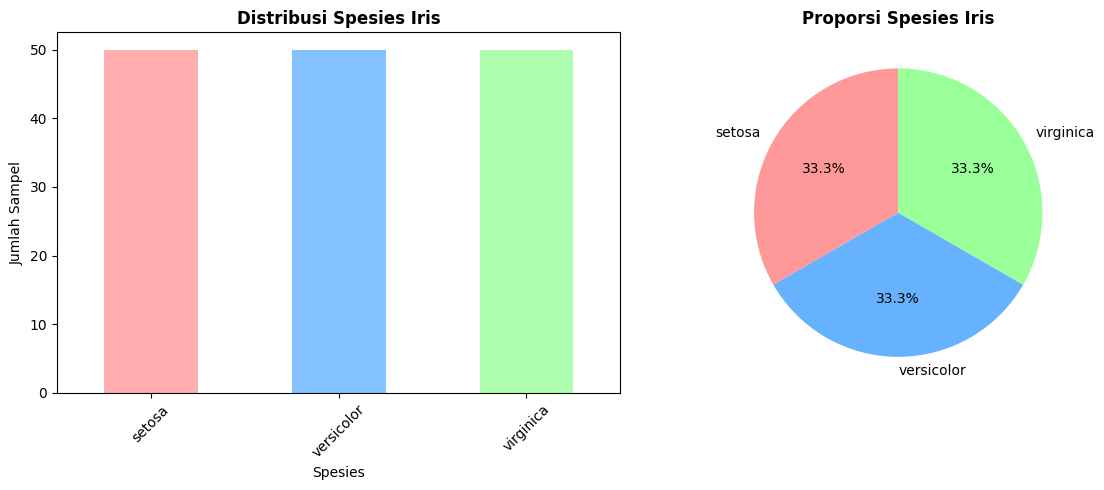

In [6]:
# Analisis target variable
print("=== ANALISIS TARGET VARIABLE ===\n")

# Distribusi kelas
target_dist = df['species'].value_counts()
target_pct = df['species'].value_counts(normalize=True) * 100

print("[DISTRIBUSI] Distribusi Kelas:")
for species in target_dist.index:
    count = target_dist[species]
    percentage = target_pct[species]
    print(f"   - {species}: {count} sampel ({percentage:.1f}%)")

# Check class balance
if target_pct.std() < 5:  # Standard deviation < 5%
    print("\n[STATUS] Dataset seimbang (balanced)")
else:
    print("\n[WARNING] Dataset tidak seimbang (imbalanced)")

# Visualisasi distribusi target
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot
target_dist.plot(kind='bar', ax=ax1, color=['#FF9999', '#66B2FF', '#99FF99'], alpha=0.8)
ax1.set_title('Distribusi Spesies Iris', fontweight='bold')
ax1.set_xlabel('Spesies')
ax1.set_ylabel('Jumlah Sampel')
ax1.tick_params(axis='x', rotation=45)

# Pie chart
target_dist.plot(kind='pie', ax=ax2, autopct='%1.1f%%', 
                colors=['#FF9999', '#66B2FF', '#99FF99'], startangle=90)
ax2.set_title('Proporsi Spesies Iris', fontweight='bold')
ax2.set_ylabel('')

plt.tight_layout()
plt.show()

## 4. Analisis Fitur dengan PyCaret

In [7]:
# Analisis univariat untuk setiap fitur
print("=== ANALISIS UNIVARIAT FITUR ===\n")

numeric_features = [col for col in df.columns if col != 'species']

# Statistik deskriptif per fitur
for feature in numeric_features:
    print(f"[ANALISIS] {feature.upper().replace('_', ' ')}:")
    stats = df[feature].describe()
    print(f"   - Range: {stats['min']:.2f} - {stats['max']:.2f}")
    print(f"   - Mean ± Std: {stats['mean']:.2f} ± {stats['std']:.2f}")
    print(f"   - Median (Q2): {stats['50%']:.2f}")
    print(f"   - IQR: {stats['75%'] - stats['25%']:.2f}")
    
    # Skewness and Kurtosis
    skewness = df[feature].skew()
    kurtosis = df[feature].kurtosis()
    skew_desc = 'Right-skewed' if skewness > 0.5 else 'Left-skewed' if skewness < -0.5 else 'Symmetric'
    print(f"   - Skewness: {skewness:.3f} ({skew_desc})")
    print(f"   - Kurtosis: {kurtosis:.3f}")
    print()

=== ANALISIS UNIVARIAT FITUR ===

[ANALISIS] SEPAL LENGTH:
   - Range: 4.30 - 7.90
   - Mean ± Std: 5.84 ± 0.83
   - Median (Q2): 5.80
   - IQR: 1.30
   - Skewness: 0.315 (Symmetric)
   - Kurtosis: -0.552

[ANALISIS] SEPAL WIDTH:
   - Range: 2.00 - 4.40
   - Mean ± Std: 3.05 ± 0.43
   - Median (Q2): 3.00
   - IQR: 0.50
   - Skewness: 0.334 (Symmetric)
   - Kurtosis: 0.291

[ANALISIS] PETAL LENGTH:
   - Range: 1.00 - 6.90
   - Mean ± Std: 3.76 ± 1.76
   - Median (Q2): 4.35
   - IQR: 3.50
   - Skewness: -0.274 (Symmetric)
   - Kurtosis: -1.402

[ANALISIS] PETAL WIDTH:
   - Range: 0.10 - 2.50
   - Mean ± Std: 1.20 ± 0.76
   - Median (Q2): 1.30
   - IQR: 1.50
   - Skewness: -0.105 (Symmetric)
   - Kurtosis: -1.340



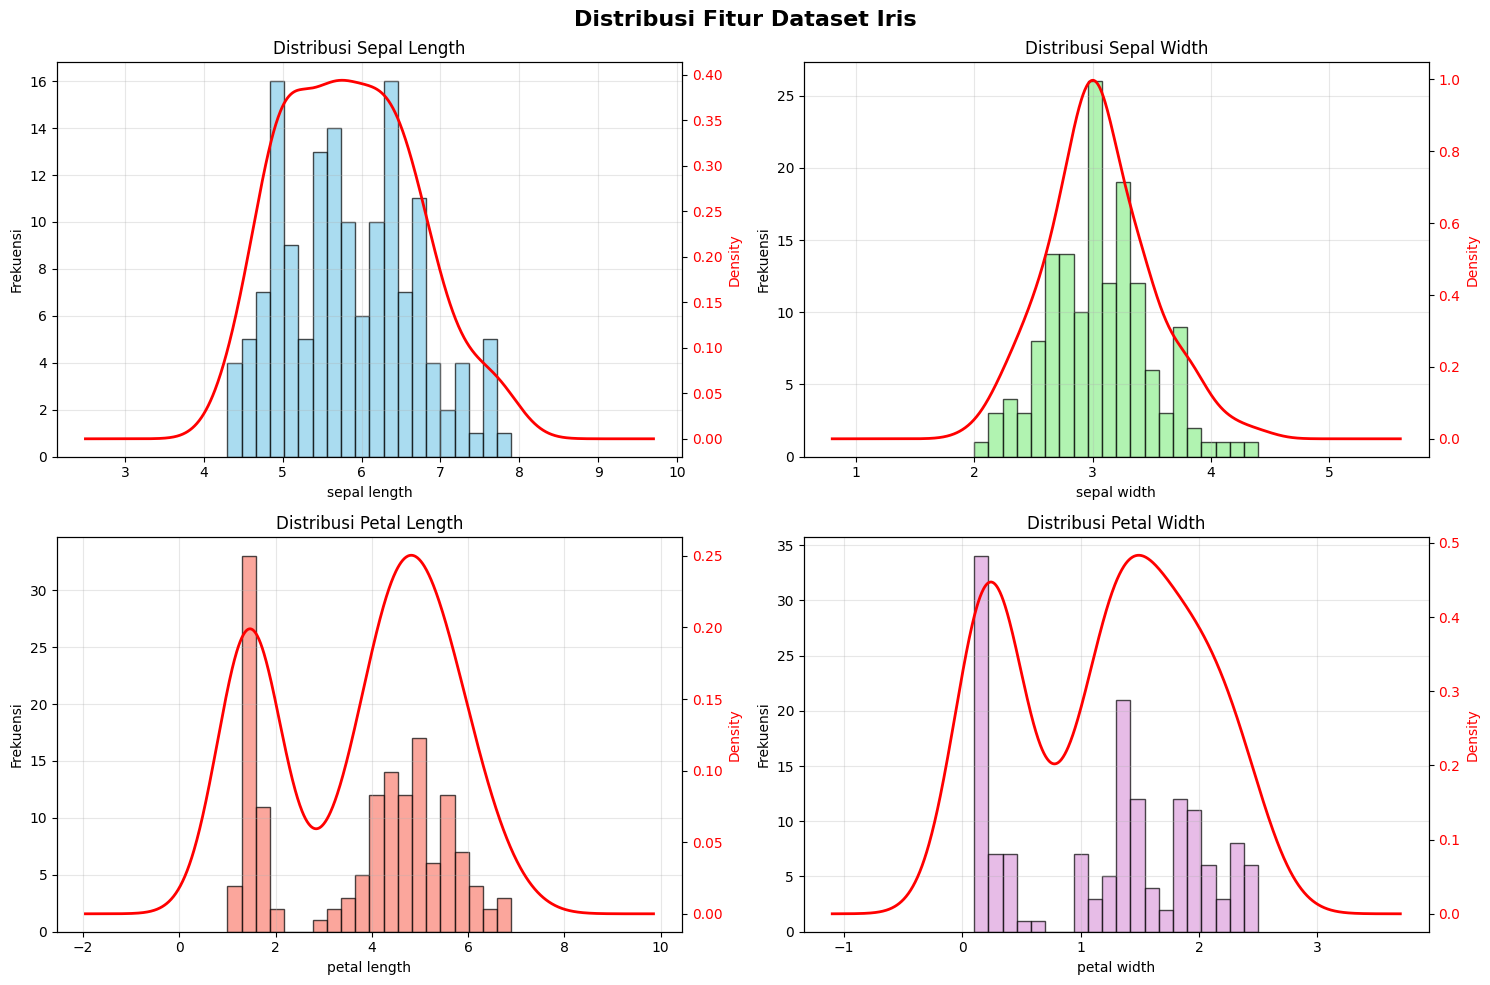

In [8]:
# Visualisasi distribusi fitur
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribusi Fitur Dataset Iris', fontsize=16, fontweight='bold')

colors = ['skyblue', 'lightgreen', 'salmon', 'plum']

for i, (feature, color) in enumerate(zip(numeric_features, colors)):
    row = i // 2
    col = i % 2
    
    # Histogram dengan KDE
    df[feature].hist(bins=20, ax=axes[row, col], color=color, alpha=0.7, edgecolor='black')
    
    # Tambahkan KDE
    ax2 = axes[row, col].twinx()
    df[feature].plot.kde(ax=ax2, color='red', linewidth=2)
    ax2.set_ylabel('Density', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    
    axes[row, col].set_title(f'Distribusi {feature.replace("_", " ").title()}')
    axes[row, col].set_xlabel(feature.replace('_', ' '))
    axes[row, col].set_ylabel('Frekuensi')
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

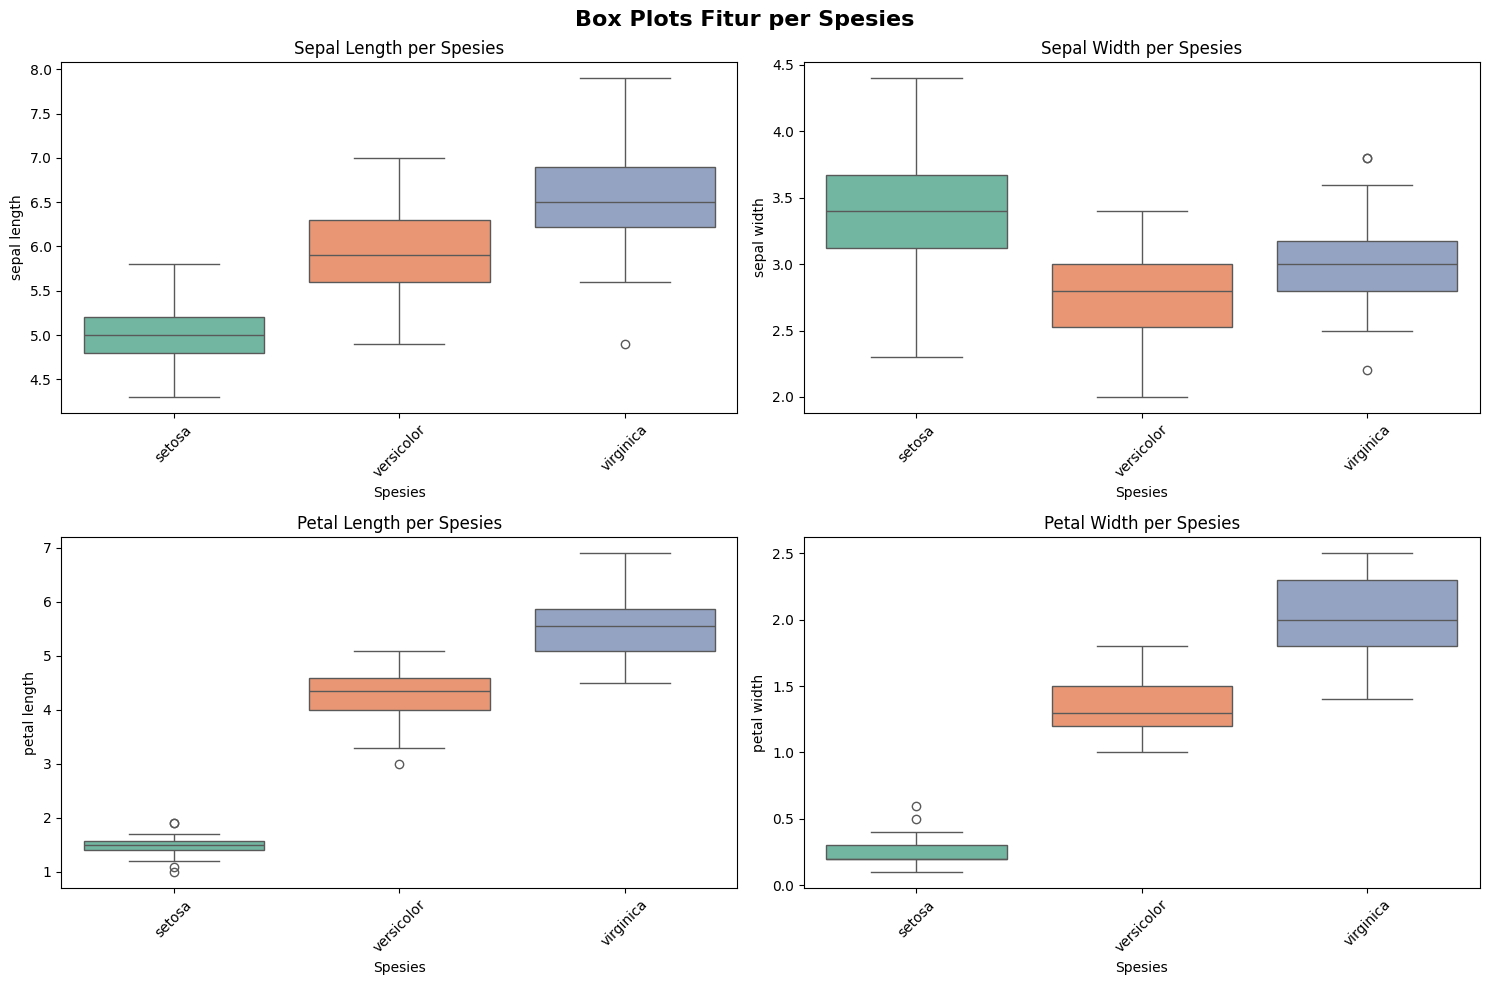

=== DETEKSI OUTLIERS (IQR Method) ===

[OUTLIER] Sepal Length:
   - Outliers: 0 (0.0%)

[OUTLIER] Sepal Width:
   - Outliers: 4 (2.7%)
   - Range outliers: 2.00 - 4.40

[OUTLIER] Petal Length:
   - Outliers: 0 (0.0%)

[OUTLIER] Petal Width:
   - Outliers: 0 (0.0%)



In [9]:
# Box plots untuk deteksi outliers dan perbandingan antar spesies
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Box Plots Fitur per Spesies', fontsize=16, fontweight='bold')

for i, feature in enumerate(numeric_features):
    row = i // 2
    col = i % 2
    
    sns.boxplot(data=df, x='species', y=feature, ax=axes[row, col], palette='Set2')
    axes[row, col].set_title(f'{feature.replace("_", " ").title()} per Spesies')
    axes[row, col].set_xlabel('Spesies')
    axes[row, col].set_ylabel(feature.replace('_', ' '))
    axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Deteksi outliers
print("=== DETEKSI OUTLIERS (IQR Method) ===\n")
for feature in numeric_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(df)) * 100
    
    print(f"[OUTLIER] {feature.replace('_', ' ').title()}:")
    print(f"   - Outliers: {outlier_count} ({outlier_percentage:.1f}%)")
    if outlier_count > 0:
        print(f"   - Range outliers: {outliers[feature].min():.2f} - {outliers[feature].max():.2f}")
    print()

## 5. Analisis Korelasi dengan PyCaret

=== MATRIKS KORELASI ===

              sepal_length  sepal_width  petal_length  petal_width
sepal_length         1.000       -0.109         0.872        0.818
sepal_width         -0.109        1.000        -0.421       -0.357
petal_length         0.872       -0.421         1.000        0.963
petal_width          0.818       -0.357         0.963        1.000


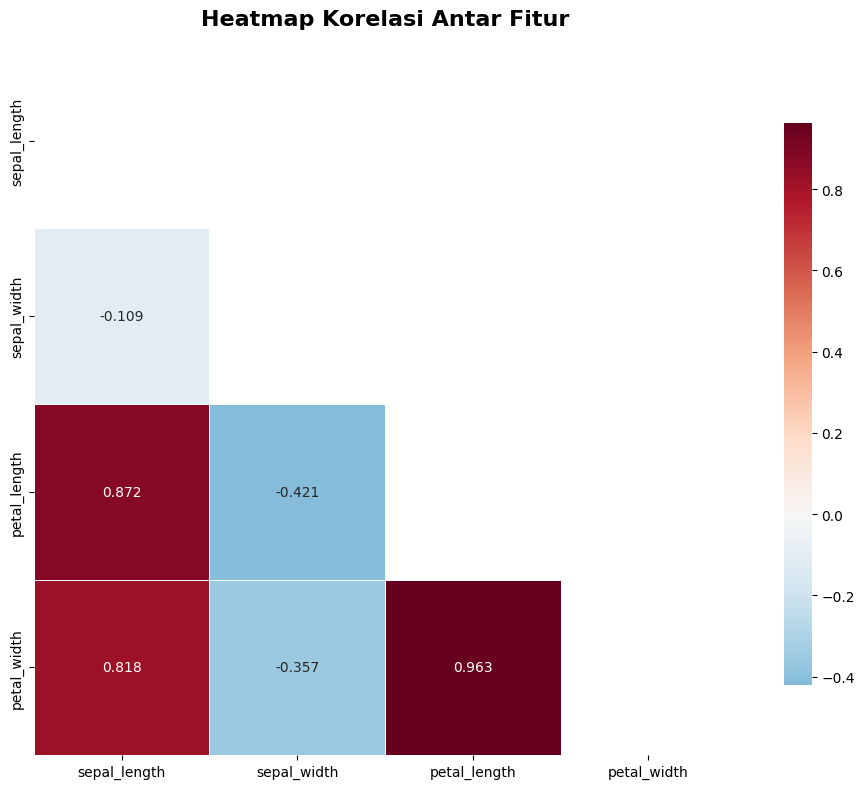


=== ANALISIS KORELASI KUAT (|r| > 0.7) ===

1. Petal Length x Petal Width
   Korelasi: 0.963 (Positif Kuat)

2. Sepal Length x Petal Length
   Korelasi: 0.872 (Positif Kuat)

3. Sepal Length x Petal Width
   Korelasi: 0.818 (Positif Kuat)



In [10]:
# Matriks korelasi
correlation_matrix = df[numeric_features].corr()

print("=== MATRIKS KORELASI ===\n")
print(correlation_matrix.round(3))

# Visualisasi heatmap korelasi
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True, 
            fmt='.3f', 
            cbar_kws={'shrink': 0.8},
            mask=mask,
            linewidths=0.5)
plt.title('Heatmap Korelasi Antar Fitur', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Analisis korelasi kuat
print("\n=== ANALISIS KORELASI KUAT (|r| > 0.7) ===\n")
strong_correlations = []

for i in range(len(numeric_features)):
    for j in range(i+1, len(numeric_features)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.7:
            strong_correlations.append({
                'feature1': numeric_features[i],
                'feature2': numeric_features[j],
                'correlation': corr_value
            })

if strong_correlations:
    strong_correlations.sort(key=lambda x: abs(x['correlation']), reverse=True)
    for idx, corr_info in enumerate(strong_correlations, 1):
        corr_type = "Positif Kuat" if corr_info['correlation'] > 0 else "Negatif Kuat"
        print(f"{idx}. {corr_info['feature1'].replace('_', ' ').title()} x {corr_info['feature2'].replace('_', ' ').title()}")
        print(f"   Korelasi: {corr_info['correlation']:.3f} ({corr_type})")
        print()
else:
    print("Tidak ada korelasi kuat yang ditemukan.")

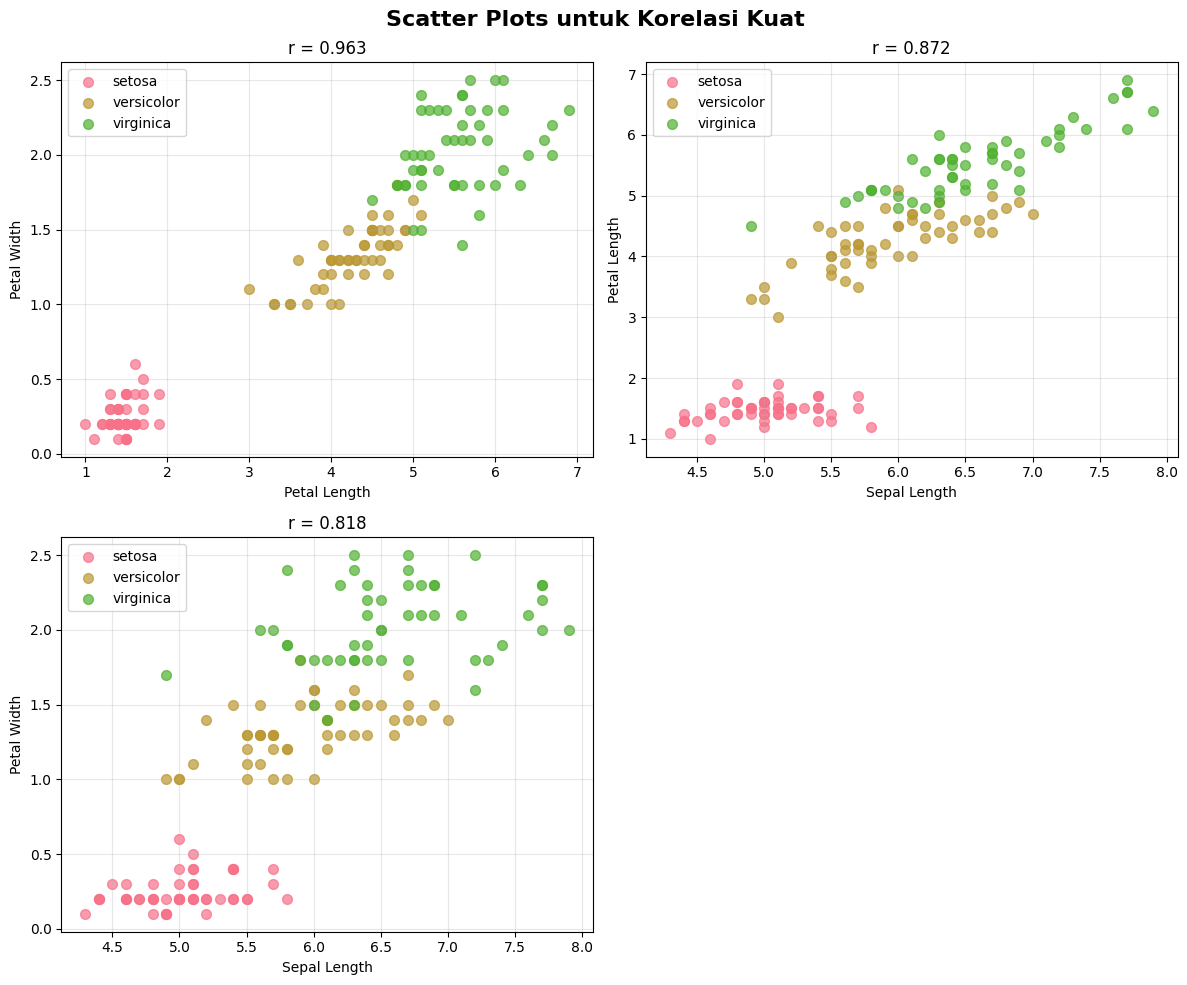

In [11]:
# Scatter plots untuk korelasi kuat
if strong_correlations:
    n_plots = len(strong_correlations)
    n_cols = min(2, n_plots)
    n_rows = (n_plots + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows))
    if n_plots == 1:
        axes = [axes]
    elif n_rows == 1:
        axes = axes
    else:
        axes = axes.flatten()
    
    fig.suptitle('Scatter Plots untuk Korelasi Kuat', fontsize=16, fontweight='bold')
    
    for idx, corr_info in enumerate(strong_correlations):
        if idx < len(axes):
            for species in df['species'].unique():
                species_data = df[df['species'] == species]
                axes[idx].scatter(species_data[corr_info['feature1']], 
                                species_data[corr_info['feature2']], 
                                label=species, alpha=0.7, s=50)
            
            axes[idx].set_xlabel(corr_info['feature1'].replace('_', ' ').title())
            axes[idx].set_ylabel(corr_info['feature2'].replace('_', ' ').title())
            axes[idx].set_title(f"r = {corr_info['correlation']:.3f}")
            axes[idx].legend()
            axes[idx].grid(True, alpha=0.3)
    
    # Hide empty subplots
    for idx in range(len(strong_correlations), len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()

## 6. Analisis Multivariat dengan PyCaret

=== PAIR PLOT ANALYSIS ===

Membuat pair plot untuk semua kombinasi fitur...


<Figure size 1200x1000 with 0 Axes>

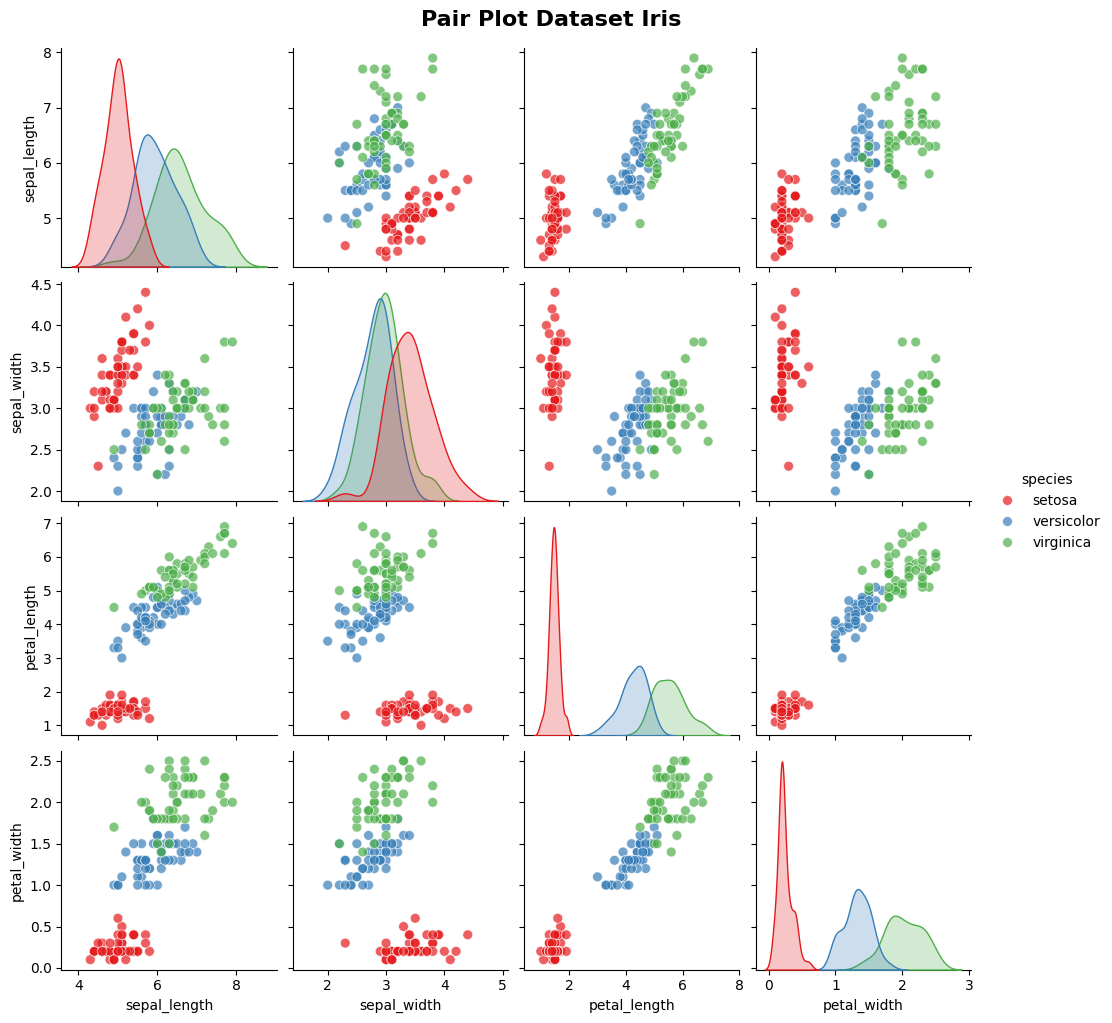

[SUCCESS] Pair plot menunjukkan hubungan antar fitur dan separabilitas antar kelas


In [12]:
# Pair plot untuk analisis multivariat
print("=== PAIR PLOT ANALYSIS ===\n")
print("Membuat pair plot untuk semua kombinasi fitur...")

plt.figure(figsize=(12, 10))
pair_plot = sns.pairplot(df, hue='species', palette='Set1', 
                        plot_kws={'alpha': 0.7, 's': 50},
                        diag_kind='kde')
pair_plot.fig.suptitle('Pair Plot Dataset Iris', y=1.02, fontsize=16, fontweight='bold')
plt.show()

print("[SUCCESS] Pair plot menunjukkan hubungan antar fitur dan separabilitas antar kelas")

=== ANALISIS PENTINGNYA FITUR ===



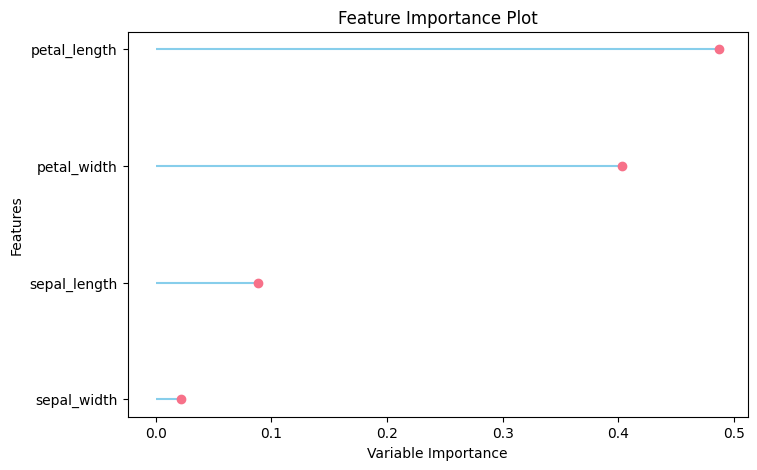

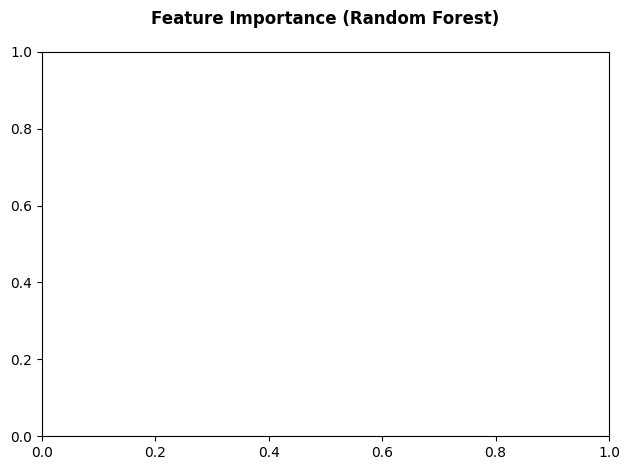

[SUCCESS] Feature importance berhasil dianalisis menggunakan Random Forest


In [13]:
# Analisis pentingnya fitur menggunakan PyCaret
print("=== ANALISIS PENTINGNYA FITUR ===\n")

try:
    # Buat model cepat untuk analisis feature importance
    rf_model = create_model('rf', verbose=False)
    
    # Plot feature importance
    plot_model(rf_model, plot='feature', save=False)
    plt.title('Feature Importance (Random Forest)', fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()
    
    print("[SUCCESS] Feature importance berhasil dianalisis menggunakan Random Forest")
    
except Exception as e:
    print(f"[WARNING] Tidak dapat membuat plot feature importance: {e}")
    print("Menggunakan analisis alternatif...")
    
    # Analisis varians antar kelas sebagai alternatif
    feature_variance = {}
    for feature in numeric_features:
        # Hitung varians antar kelas
        class_means = df.groupby('species')[feature].mean()
        overall_mean = df[feature].mean()
        between_class_var = sum([(mean - overall_mean)**2 for mean in class_means])
        feature_variance[feature] = between_class_var
    
    # Sort by variance
    sorted_features = sorted(feature_variance.items(), key=lambda x: x[1], reverse=True)
    
    print("[RANKING] Ranking Fitur berdasarkan Varians Antar Kelas:")
    for idx, (feature, variance) in enumerate(sorted_features, 1):
        print(f"{idx}. {feature.replace('_', ' ').title()}: {variance:.3f}")

## 7. Analisis per Kelas/Spesies

In [14]:
# Statistik deskriptif per spesies
print("=== STATISTIK DESKRIPTIF PER SPESIES ===\n")

species_labels = {'setosa': 'SETOSA', 
                 'versicolor': 'VERSICOLOR', 
                 'virginica': 'VIRGINICA'}

for species in df['species'].unique():
    print(f"[SPESIES] {species_labels.get(species, species.upper())}")
    print("=" * 50)
    
    species_data = df[df['species'] == species][numeric_features]
    
    # Statistik deskriptif
    stats = species_data.describe().round(3)
    print(stats)
    
    # Karakteristik unik spesies ini
    print("\n[KARAKTERISTIK] Karakteristik Khas:")
    for feature in numeric_features:
        mean_val = species_data[feature].mean()
        overall_mean = df[feature].mean()
        diff_pct = ((mean_val - overall_mean) / overall_mean) * 100
        
        if abs(diff_pct) > 10:  # Jika berbeda > 10% dari rata-rata keseluruhan
            direction = "lebih tinggi" if diff_pct > 0 else "lebih rendah"
            print(f"   - {feature.replace('_', ' ').title()}: {diff_pct:+.1f}% {direction} dari rata-rata")
    
    print("\n" + "="*70 + "\n")

=== STATISTIK DESKRIPTIF PER SPESIES ===

[SPESIES] SETOSA
       sepal_length  sepal_width  petal_length  petal_width
count        50.000       50.000        50.000       50.000
mean          5.006        3.418         1.464        0.244
std           0.352        0.381         0.174        0.107
min           4.300        2.300         1.000        0.100
25%           4.800        3.125         1.400        0.200
50%           5.000        3.400         1.500        0.200
75%           5.200        3.675         1.575        0.300
max           5.800        4.400         1.900        0.600

[KARAKTERISTIK] Karakteristik Khas:
   - Sepal Length: -14.3% lebih rendah dari rata-rata
   - Sepal Width: +11.9% lebih tinggi dari rata-rata
   - Petal Length: -61.1% lebih rendah dari rata-rata
   - Petal Width: -79.6% lebih rendah dari rata-rata


[SPESIES] VERSICOLOR
       sepal_length  sepal_width  petal_length  petal_width
count        50.000       50.000         50.00       50.000
mean   

=== PERBANDINGAN RATA-RATA ANTAR SPESIES ===

[PERBANDINGAN] Rata-rata Fitur per Spesies:
            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             5.006        3.418         1.464        0.244
versicolor         5.936        2.770         4.260        1.326
virginica          6.588        2.974         5.552        2.026


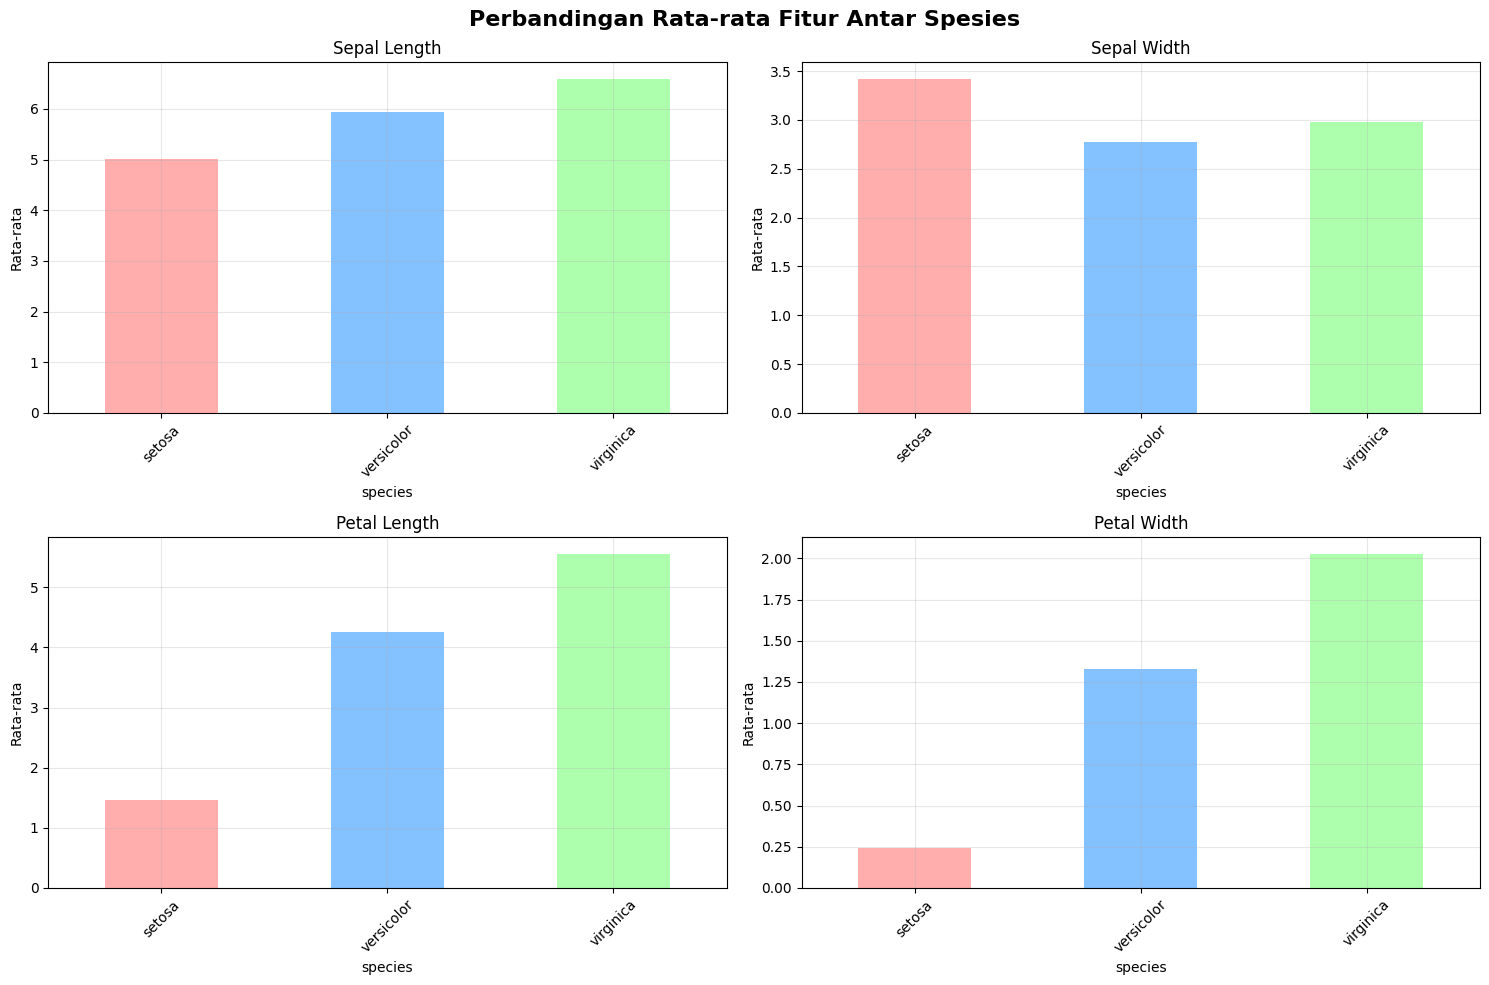

In [15]:
# Perbandingan rata-rata antar spesies
print("=== PERBANDINGAN RATA-RATA ANTAR SPESIES ===\n")

species_means = df.groupby('species')[numeric_features].mean().round(3)
print("[PERBANDINGAN] Rata-rata Fitur per Spesies:")
print(species_means)

# Visualisasi perbandingan
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Perbandingan Rata-rata Fitur Antar Spesies', fontsize=16, fontweight='bold')

for i, feature in enumerate(numeric_features):
    row = i // 2
    col = i % 2
    
    species_means[feature].plot(kind='bar', ax=axes[row, col], 
                               color=['#FF9999', '#66B2FF', '#99FF99'], 
                               alpha=0.8)
    axes[row, col].set_title(f'{feature.replace("_", " ").title()}')
    axes[row, col].set_ylabel('Rata-rata')
    axes[row, col].tick_params(axis='x', rotation=45)
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Ringkasan Insights dan Rekomendasi

In [16]:
print("[SUMMARY]" + "="*70)
print("                 RINGKASAN DATA UNDERSTANDING")
print("="*72 + "[SUMMARY]\n")

# Dataset Overview
print("[OVERVIEW] DATASET:")
print(f"   - Ukuran: {df.shape[0]} sampel x {df.shape[1]} fitur")
print(f"   - Target: {df['species'].nunique()} kelas (klasifikasi)")
is_clean = df.isnull().sum().sum() == 0 and df.duplicated().sum() == 0
print(f"   - Kualitas: {'[OK] Bersih' if is_clean else '[WARNING] Perlu cleaning'}")
is_balanced = df['species'].value_counts().std() < 5
print(f"   - Balance: {'[OK] Seimbang' if is_balanced else '[WARNING] Tidak seimbang'}")

# Feature Characteristics
print("\n[FITUR] KARAKTERISTIK FITUR:")
for feature in numeric_features:
    skewness = df[feature].skew()
    if abs(skewness) < 0.5:
        skew_desc = 'simetris'
    elif skewness > 0:
        skew_desc = 'right-skewed'
    else:
        skew_desc = 'left-skewed'
    print(f"   - {feature.replace('_', ' ').title()}: {skew_desc}, range {df[feature].min():.1f}-{df[feature].max():.1f}")

# Correlation Insights
print("\n[KORELASI] INSIGHTS KORELASI:")
if strong_correlations:
    for corr_info in strong_correlations:
        print(f"   - {corr_info['feature1'].replace('_', ' ').title()} dan {corr_info['feature2'].replace('_', ' ').title()}: korelasi kuat ({corr_info['correlation']:.3f})")
else:
    print("   - Tidak ada korelasi yang sangat kuat antar fitur")

# Class Separability
print("\n[SEPARABILITAS] SEPARABILITAS KELAS:")
separability_score = 0
for feature in numeric_features:
    species_means = df.groupby('species')[feature].mean()
    species_std = df.groupby('species')[feature].std().mean()
    mean_diff = species_means.max() - species_means.min()
    if mean_diff > 2 * species_std:
        separability_score += 1
        print(f"   - {feature.replace('_', ' ').title()}: [OK] Baik untuk separasi kelas")

if separability_score >= 3:
    print("   [EXCELLENT] Dataset memiliki separabilitas kelas yang excellent!")
elif separability_score >= 2:
    print("   [GOOD] Dataset memiliki separabilitas kelas yang baik")
else:
    print("   [WARNING] Separabilitas kelas mungkin challenging")

# Recommendations
print("\n[REKOMENDASI] REKOMENDASI UNTUK MODELING:")
print("   - [OK] Dataset siap untuk machine learning")
print("   - [OK] Tidak perlu preprocessing kompleks")
print("   - [CONSIDER] Pertimbangkan feature scaling untuk beberapa algoritma")
print("   - [INFO] Semua algoritma klasifikasi akan bekerja dengan baik")
print("   - [PREDICT] Expected accuracy: Tinggi (>90%) karena data berkualitas")

if strong_correlations:
    print("   - [WARNING] Pertimbangkan feature selection jika ada overfitting")

print("\n" + "="*72)
print("[COMPLETE] Data Understanding dengan PyCaret selesai!")
print("="*72)

[SUMMARY]======================================================================
                 RINGKASAN DATA UNDERSTANDING
========================================================================[SUMMARY]

[OVERVIEW] DATASET:
   - Ukuran: 150 sampel x 5 fitur
   - Target: 3 kelas (klasifikasi)
   - Kualitas: [WARNING] Perlu cleaning
   - Balance: [OK] Seimbang

[FITUR] KARAKTERISTIK FITUR:
   - Sepal Length: simetris, range 4.3-7.9
   - Sepal Width: simetris, range 2.0-4.4
   - Petal Length: simetris, range 1.0-6.9
   - Petal Width: simetris, range 0.1-2.5

[KORELASI] INSIGHTS KORELASI:
   - Petal Length dan Petal Width: korelasi kuat (0.963)
   - Sepal Length dan Petal Length: korelasi kuat (0.872)
   - Sepal Length dan Petal Width: korelasi kuat (0.818)

[SEPARABILITAS] SEPARABILITAS KELAS:
   - Sepal Length: [OK] Baik untuk separasi kelas
   - Petal Length: [OK] Baik untuk separasi kelas
   - Petal Width: [OK] Baik untuk separasi kelas
   [EXCELLENT] Dataset memiliki separabilita